## Analyzing Tweets

In [2]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re  
import spacy
from collections import Counter

In [29]:
nlp = spacy.load('es_core_news_sm') #en_core_news_lg

In [3]:
pd.set_option("display.max_colwidth",None)

In [4]:
df_rc = pd.read_csv("RC_Tweets_103121_012622.csv", index_col = 0)

In [5]:
df_rc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 3241
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           3242 non-null   object
 1   author         3242 non-null   object
 2   id             3242 non-null   int64 
 3   id_str         3242 non-null   int64 
 4   tweets         3242 non-null   object
 5   language       3242 non-null   object
 6   source         3242 non-null   object
 7   source_url     3242 non-null   object
 8   retweet_count  3242 non-null   int64 
 9   likes          3242 non-null   int64 
 10  time           3242 non-null   object
 11  Hour           3242 non-null   int64 
 12  Date           3242 non-null   object
dtypes: int64(5), object(8)
memory usage: 354.6+ KB


In [6]:
#df_rc['Hour'] = df_rc['time'].dt.hour
df_rc['time'] = df_rc['time'].astype('datetime64')
df_rc['Date'] = df_rc['time'].dt.date
df_rc['Date'] = pd.to_datetime(df_rc['Date'])

In [7]:
df_rc

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
0,MashiRafael,MashiRafael,1486469645897019400,1486469645897019400,RT @relicheandres: BANCOCRACIA \n\n287 mil (doscientos ochenta y siete mil) reclamos por fraude informático y sustracción de dinero en los ba…,es,Twitter for iPhone,http://twitter.com/download/iphone,177,0,2022-01-26 22:42:35,22,2022-01-26
1,MashiRafael,MashiRafael,1486433624866140163,1486433624866140163,https://t.co/Qii4tz3VZd,und,Twitter for iPhone,http://twitter.com/download/iphone,236,456,2022-01-26 20:19:27,20,2022-01-26
2,MashiRafael,MashiRafael,1486416582914060290,1486416582914060290,"RT @MashiRafael: 🇪🇨🇪🇨🇪🇨\nNo fue casualidad. Fue trabajo, fue compromiso, fue un buen Gobierno.\n\n#SabesQueEstábamosMejor https://t.co/MDZh4uE…",es,Twitter for iPhone,http://twitter.com/download/iphone,439,0,2022-01-26 19:11:44,19,2022-01-26
3,MashiRafael,MashiRafael,1486415886609170436,1486415886609170436,RT @MashiRafael: 🇪🇨🇪🇨🇪🇨\nEcuatorianos:\nTomen dos minutos para ver este video y difúndanlo.\nJugaron con lo más sagrado: la seguridad de nuest…,es,Twitter for iPhone,http://twitter.com/download/iphone,1314,0,2022-01-26 19:08:58,19,2022-01-26
4,MashiRafael,MashiRafael,1486413954737967105,1486413954737967105,"🇪🇨🇪🇨🇪🇨\nEsta es la verdad histórica, con DATOS, no RELATOS.\n#LosCorruptosSiempreFueronEllos\n https://t.co/6QXokp5NEx",es,Twitter for iPhone,http://twitter.com/download/iphone,188,293,2022-01-26 19:01:17,19,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,MashiRafael,MashiRafael,1454861081936023556,1454861081936023556,Más humillación para el país por la evidente politización de la justicia.\n#LosCorruptosSiempreFueronEllos https://t.co/UQrTuR05Yx,es,Twitter for iPhone,http://twitter.com/download/iphone,335,563,2021-10-31 17:21:26,17,2021-10-31
3238,MashiRafael,MashiRafael,1454857627620585476,1454857627620585476,🇪🇨🇪🇨🇪🇨\nEsto es EXTREMADAMENTE grave. Las reservas patrióticas del país deben oponerse con todas su fuerzas.\nOjalá la Asamblea haga algo.\nSolo se entiende desde la invención de mantenernos en el subdesarrollo para seguirnos dominando.\n#LosCorruptosSiempreFueronEllos https://t.co/5McBpaw1OS,es,Twitter for iPhone,http://twitter.com/download/iphone,406,612,2021-10-31 17:07:43,17,2021-10-31
3239,MashiRafael,MashiRafael,1454857080859414533,1454857080859414533,"🇪🇨🇪🇨🇪🇨\nSi no están obligados a regresar al país, ¿para qué el Estado los beca?\nRealmente esto ya no se puede entender solo como incompetencia, sino también como profundo desprecio por la Patria.\nNos condenan al subdesarrollo\n#LosCorruptosSiempreFueronellos https://t.co/gma1OqRzw4",es,Twitter for iPhone,http://twitter.com/download/iphone,638,1175,2021-10-31 17:05:32,17,2021-10-31
3240,MashiRafael,MashiRafael,1454855989975556099,1454855989975556099,"En la Sainte Chapelle de París, en mi avión privado y disfrutando los 70.000 millones enterrados en caletas (¿no es así el cuento?).\nYa más seriamente, una joya gótica estremecedora.\n#LosCorruptosSiempreFueronEllos https://t.co/FFo80HMSgJ",es,Twitter for iPhone,http://twitter.com/download/iphone,655,2533,2021-10-31 17:01:12,17,2021-10-31


#### Split between tweets and retweets

In [8]:
rc_retweets = df_rc[df_rc.tweets.str.contains("RT")]
rc_retweets = rc_retweets.reset_index(drop=True)

rc_tweets = df_rc[~df_rc.tweets.str.contains("RT")]
rc_tweets = rc_tweets.reset_index(drop=True)

In [9]:
rc_retweets

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
0,MashiRafael,MashiRafael,1486469645897019400,1486469645897019400,RT @relicheandres: BANCOCRACIA \n\n287 mil (doscientos ochenta y siete mil) reclamos por fraude informático y sustracción de dinero en los ba…,es,Twitter for iPhone,http://twitter.com/download/iphone,177,0,2022-01-26 22:42:35,22,2022-01-26
1,MashiRafael,MashiRafael,1486416582914060290,1486416582914060290,"RT @MashiRafael: 🇪🇨🇪🇨🇪🇨\nNo fue casualidad. Fue trabajo, fue compromiso, fue un buen Gobierno.\n\n#SabesQueEstábamosMejor https://t.co/MDZh4uE…",es,Twitter for iPhone,http://twitter.com/download/iphone,439,0,2022-01-26 19:11:44,19,2022-01-26
2,MashiRafael,MashiRafael,1486415886609170436,1486415886609170436,RT @MashiRafael: 🇪🇨🇪🇨🇪🇨\nEcuatorianos:\nTomen dos minutos para ver este video y difúndanlo.\nJugaron con lo más sagrado: la seguridad de nuest…,es,Twitter for iPhone,http://twitter.com/download/iphone,1314,0,2022-01-26 19:08:58,19,2022-01-26
3,MashiRafael,MashiRafael,1486410980586409986,1486410980586409986,RT @radio_pichincha: 🔴 #Atención l Procurador Íñigo Salvador solicita al presidente @LassoGuillermo se efectúe el pago a la compañía Perenc…,es,Twitter for iPhone,http://twitter.com/download/iphone,81,0,2022-01-26 18:49:28,18,2022-01-26
4,MashiRafael,MashiRafael,1486347003445587970,1486347003445587970,"RT @relicheandres: REAPARECIÓ EL VOCERO\n\n@carlosjijon, vocero del Gobierno que había estado de bajo perfil durante varias semanas, reaparec…",es,Twitter for iPhone,http://twitter.com/download/iphone,240,0,2022-01-26 14:35:15,14,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,MashiRafael,MashiRafael,1454864404865032200,1454864404865032200,RT @AngelRobertoS15: @MashiRafael Ayer hoy y siempre https://t.co/CXPytYDSRX,es,Twitter for iPhone,http://twitter.com/download/iphone,131,0,2021-10-31 17:34:38,17,2021-10-31
2299,MashiRafael,MashiRafael,1454863677648211979,1454863677648211979,RT @jpjaramillo25: ¿Qué tal si en lugar de estar pensando en retomar la educación militar pensamos en retomar el Bachillerato Internacional…,es,Twitter for iPhone,http://twitter.com/download/iphone,271,0,2021-10-31 17:31:45,17,2021-10-31
2300,MashiRafael,MashiRafael,1454863647654690820,1454863647654690820,"RT @VivianaVeloz18: Parece que nos quieren convertir en un paraíso fiscal, donde no se pregunta de dónde salieron los recursos y menos a…",es,Twitter for iPhone,http://twitter.com/download/iphone,456,0,2021-10-31 17:31:38,17,2021-10-31
2301,MashiRafael,MashiRafael,1454861170024882180,1454861170024882180,RT @LFMolinaO: @VillaFernando_ para el “Lawfare” en el caso Balda se valieron del Registro Oficial para alegar el nombramiento de @MashiRaf…,es,Twitter for iPhone,http://twitter.com/download/iphone,251,0,2021-10-31 17:21:47,17,2021-10-31


In [10]:
rc_tweets

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
0,MashiRafael,MashiRafael,1486433624866140163,1486433624866140163,https://t.co/Qii4tz3VZd,und,Twitter for iPhone,http://twitter.com/download/iphone,236,456,2022-01-26 20:19:27,20,2022-01-26
1,MashiRafael,MashiRafael,1486413954737967105,1486413954737967105,"🇪🇨🇪🇨🇪🇨\nEsta es la verdad histórica, con DATOS, no RELATOS.\n#LosCorruptosSiempreFueronEllos\n https://t.co/6QXokp5NEx",es,Twitter for iPhone,http://twitter.com/download/iphone,188,293,2022-01-26 19:01:17,19,2022-01-26
2,MashiRafael,MashiRafael,1486412442313936901,1486412442313936901,"👇🏼Este es el documento que el procurador dice que es “confidencial”. En él pide pago a Perenco por más de 374 millones de dólares, después de haber declarado culpable al Estado.\n¿Confidencial? ¡Otra cosa es que quiera tapar su traición a la Patria!\n#LosCorruptosSiempreFueronEllos https://t.co/yJQIiXCD6o https://t.co/WuymbXlDwt",es,Twitter for iPhone,http://twitter.com/download/iphone,465,611,2022-01-26 18:55:17,18,2022-01-26
3,MashiRafael,MashiRafael,1486410775673675777,1486410775673675777,¡El colmo del descaro!\nLos pájaros disparan a las escopetas.\nEl procurador trata de amedrentar al legislador que lleva su juicio político.\nMás temprano que tarde este tipejo impuesto por Moreno y Trujillo tendrá que responder por todos sus abusos e incapacidad. https://t.co/yJQIiXCD6o,es,Twitter for iPhone,http://twitter.com/download/iphone,320,523,2022-01-26 18:48:39,18,2022-01-26
4,MashiRafael,MashiRafael,1486406878120890371,1486406878120890371,"🇪🇨🇪🇨🇪🇨\nNo fue casualidad. Fue trabajo, fue compromiso, fue un buen Gobierno.\n\n#SabesQueEstábamosMejor https://t.co/MDZh4uEm34",es,Twitter for iPhone,http://twitter.com/download/iphone,439,794,2022-01-26 18:33:10,18,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,MashiRafael,MashiRafael,1454861872721711106,1454861872721711106,Más humillación para el país. Ojalá echándome tontamente la culpa solucionen los problemas.\n#LosCorruptosSiempreFueronEllos https://t.co/Gp8S6gCUfY,es,Twitter for iPhone,http://twitter.com/download/iphone,476,882,2021-10-31 17:24:35,17,2021-10-31
935,MashiRafael,MashiRafael,1454861081936023556,1454861081936023556,Más humillación para el país por la evidente politización de la justicia.\n#LosCorruptosSiempreFueronEllos https://t.co/UQrTuR05Yx,es,Twitter for iPhone,http://twitter.com/download/iphone,335,563,2021-10-31 17:21:26,17,2021-10-31
936,MashiRafael,MashiRafael,1454857627620585476,1454857627620585476,🇪🇨🇪🇨🇪🇨\nEsto es EXTREMADAMENTE grave. Las reservas patrióticas del país deben oponerse con todas su fuerzas.\nOjalá la Asamblea haga algo.\nSolo se entiende desde la invención de mantenernos en el subdesarrollo para seguirnos dominando.\n#LosCorruptosSiempreFueronEllos https://t.co/5McBpaw1OS,es,Twitter for iPhone,http://twitter.com/download/iphone,406,612,2021-10-31 17:07:43,17,2021-10-31
937,MashiRafael,MashiRafael,1454857080859414533,1454857080859414533,"🇪🇨🇪🇨🇪🇨\nSi no están obligados a regresar al país, ¿para qué el Estado los beca?\nRealmente esto ya no se puede entender solo como incompetencia, sino también como profundo desprecio por la Patria.\nNos condenan al subdesarrollo\n#LosCorruptosSiempreFueronellos https://t.co/gma1OqRzw4",es,Twitter for iPhone,http://twitter.com/download/iphone,638,1175,2021-10-31 17:05:32,17,2021-10-31


In [11]:
rc_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user           939 non-null    object        
 1   author         939 non-null    object        
 2   id             939 non-null    int64         
 3   id_str         939 non-null    int64         
 4   tweets         939 non-null    object        
 5   language       939 non-null    object        
 6   source         939 non-null    object        
 7   source_url     939 non-null    object        
 8   retweet_count  939 non-null    int64         
 9   likes          939 non-null    int64         
 10  time           939 non-null    datetime64[ns]
 11  Hour           939 non-null    int64         
 12  Date           939 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 95.5+ KB


#### RC Tweets vs Retweets Across Time

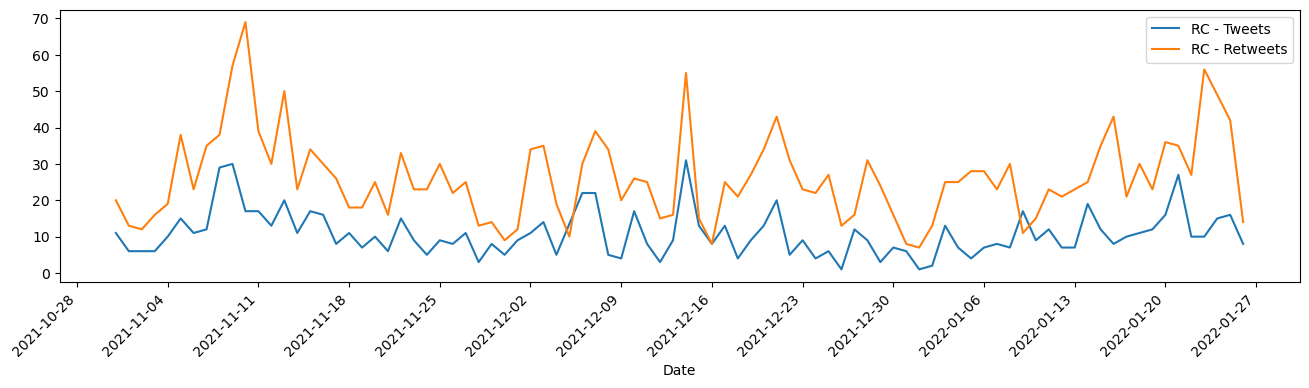

In [12]:
# Layered Time Series:
time_tweets = pd.Series(data=rc_tweets.Date.value_counts(), index=rc_tweets['Date'])
time_tweets.plot(figsize=(16, 4), label="RC - Tweets", legend=True)

time_retweets = pd.Series(data=rc_retweets.Date.value_counts(), index=rc_retweets['Date'])
time_retweets.plot(figsize=(16, 4), label="RC - Retweets", legend=True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

Rafael Correa tuvo gran actividad en la red social Twitter al crear Tweets, tanto como compartir Retweets, durante la epoca de campaña electoral de segunda vuelta. Justamente, el día de elecciones y en el que se anunció al ganador de las elecciones presidenciales 2021, la actividad de RC disminuyó considerablemente en el contenido compartido, mas no tanto en el contenido creado (Tweets).

Analizaremos en un principio los tweets de Rafael Correa, y haremos una comparación rápida sobre el contenido de sus Retweets. Iremos de una persepectiva general del sentimiento y temas más frecuentes hasta comparar el periodo antes y después de las elecciones.

#### RC Tweets Descriptive Analysis - Understanding our Dataset

#### 1) RC Tweets - Likes vs Retweets Count

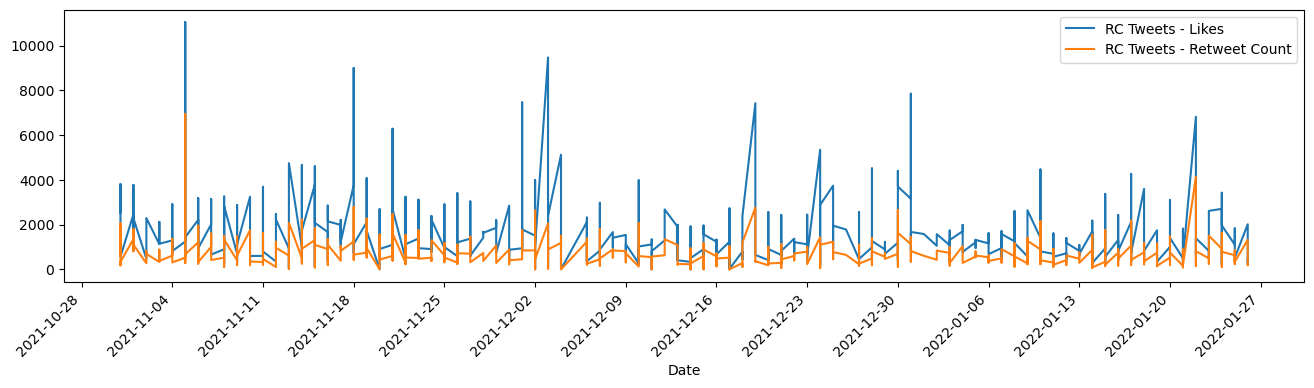

In [13]:
# Layered Time Series:
time_likes = pd.Series(data=rc_tweets.likes.values, index=rc_tweets['Date'])
time_likes.plot(figsize=(16, 4), label="RC Tweets - Likes", legend=True)

time_retweets_count = pd.Series(data=rc_tweets.retweet_count.values, index=rc_tweets['Date'])
time_retweets_count.plot(figsize=(16, 4), label="RC Tweets - Retweet Count", legend=True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

In [15]:
rc_tweets[rc_tweets['likes']>10000]['tweets']

889    🇪🇨🇪🇨🇪🇨\nPor favor, difunde mi mensaje sobre Pandora Papers.\n#LosCorruptosSiempreFueronEllos https://t.co/SKRsvTpv55
Name: tweets, dtype: object

#### 2) RC Tweets - With Different Languages

In [16]:
rc_tweets.language.value_counts()

es     861
und     69
en       4
pt       3
pl       1
fr       1
Name: language, dtype: int64

In [17]:
rc_tweets[rc_tweets['language']=='und']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
0,MashiRafael,MashiRafael,1486433624866140163,1486433624866140163,https://t.co/Qii4tz3VZd,und,Twitter for iPhone,http://twitter.com/download/iphone,236,456,2022-01-26 20:19:27,20,2022-01-26
12,MashiRafael,MashiRafael,1486028258634252291,1486028258634252291,😢😢😢 https://t.co/IaNhNZgw0U,und,Twitter for iPhone,http://twitter.com/download/iphone,238,778,2022-01-25 17:28:40,17,2022-01-25
26,MashiRafael,MashiRafael,1485732582943830018,1485732582943830018,🤣 https://t.co/RsCFu7L0I9 https://t.co/dPhXxrPZ5r,und,Twitter for iPhone,http://twitter.com/download/iphone,386,1072,2022-01-24 21:53:46,21,2022-01-24
42,MashiRafael,MashiRafael,1485303165469675521,1485303165469675521,https://t.co/p1ROD5wYON,und,Twitter for iPhone,http://twitter.com/download/iphone,678,1458,2022-01-23 17:27:24,17,2022-01-23
53,MashiRafael,MashiRafael,1484785467207860225,1484785467207860225,#ConLaRCEstábamosMásSeguros https://t.co/k08ucs5U31,und,Twitter for iPhone,http://twitter.com/download/iphone,314,698,2022-01-22 07:10:16,7,2022-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,MashiRafael,MashiRafael,1456665965891100674,1456665965891100674,https://t.co/HwWovwa6yO,und,Twitter for iPhone,http://twitter.com/download/iphone,685,2081,2021-11-05 16:53:24,16,2021-11-05
904,MashiRafael,MashiRafael,1456258050780655637,1456258050780655637,https://t.co/shutTCtnda,und,Twitter for iPhone,http://twitter.com/download/iphone,499,1105,2021-11-04 13:52:29,13,2021-11-04
912,MashiRafael,MashiRafael,1455959637270974466,1455959637270974466,https://t.co/IHyDHHduDL,und,Twitter for iPhone,http://twitter.com/download/iphone,835,2118,2021-11-03 18:06:42,18,2021-11-03
920,MashiRafael,MashiRafael,1455440769968443394,1455440769968443394,😉 https://t.co/70D2Rc7r2s,und,Twitter for iPhone,http://twitter.com/download/iphone,822,2058,2021-11-02 07:44:54,7,2021-11-02


In [18]:
rc_tweets[rc_tweets['language']=='en']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
152,MashiRafael,MashiRafael,1482273642134360064,1482273642134360064,Fact Sheet: Beneficial Ownership Information Reporting Notice of Proposed Rulemaking (NPRM) | https://t.co/8bBhNiWR48 https://t.co/2sKYuPNtI6,en,Twitter for iPhone,http://twitter.com/download/iphone,143,248,2022-01-15 08:49:10,8,2022-01-15
614,MashiRafael,MashiRafael,1464004546246713346,1464004546246713346,"Another president under investigation, US condemned as tax haven by European Parliament as Pandora Papers fallout continues - ICIJ https://t.co/Kgj5esnfL0",en,Twitter for iPhone,http://twitter.com/download/iphone,537,890,2021-11-25 22:54:18,22,2021-11-25
785,MashiRafael,MashiRafael,1458602937173880832,1458602937173880832,Pandora Papers: A simple guide to the Pandora Papers leak - BBC News https://t.co/g7k0fePQer,en,Twitter for iPhone,http://twitter.com/download/iphone,804,1284,2021-11-11 01:10:14,1,2021-11-11
916,MashiRafael,MashiRafael,1455609364631494663,1455609364631494663,"World Desperately Needs Whistleblowers as Big Media, Big Tech Curbing Free Speech, Ex-UN Expert Says - 02.11.2021, Sputnik International https://t.co/6j60lWmiNO",en,Twitter for iPhone,http://twitter.com/download/iphone,273,475,2021-11-02 18:54:51,18,2021-11-02


In [19]:
rc_tweets[rc_tweets['language']=='fr']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
124,MashiRafael,MashiRafael,1483379735099060233,1483379735099060233,"“Depuis plus de dix ans, Jean-Luc Mélenchon prône la « révolution citoyenne ». La formulation vient de Rafel Correa, élu président de l’Équateur en 2007”🇪🇨 https://t.co/iakFwShzuo",fr,Twitter for iPhone,http://twitter.com/download/iphone,224,451,2022-01-18 10:04:23,10,2022-01-18


In [20]:
rc_tweets[rc_tweets['language']=='pt']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
394,MashiRafael,MashiRafael,1471757115417055232,1471757115417055232,"Lula tem 48% e vence no primeiro turno, mostra pesquisa Datafolha https://t.co/lNIYIL9lcn",pt,Twitter for iPhone,http://twitter.com/download/iphone,144,286,2021-12-17 08:20:14,8,2021-12-17
464,MashiRafael,MashiRafael,1469773833066401802,1469773833066401802,@diego_culcay ¡Felicidades!,pt,Twitter for iPhone,http://twitter.com/download/iphone,1,15,2021-12-11 20:59:23,20,2021-12-11
609,MashiRafael,MashiRafael,1464214645267476481,1464214645267476481,¡Inaudito!\n#LosCorruptosSiempreFueronEllos https://t.co/VOl6lLiQ6A,pt,Twitter for iPhone,http://twitter.com/download/iphone,551,854,2021-11-26 12:49:09,12,2021-11-26


In [21]:
rc_tweets[rc_tweets['language']=='tl']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date


In [22]:
rc_tweets[rc_tweets['language']=='eu']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date


In [23]:
rc_tweets[rc_tweets['language']=='ca']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date


In [24]:
rc_tweets[rc_tweets['language']=='hu']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date


Esta bien mantener los tweets de otros idiomas para analisis generales, aunque para analisis de sentimiento es mejor remover los tweets de otros idiomas que no sean "es" espanol

#### 3) RC Tweets - Source (Device)

In [25]:
rc_tweets.source.value_counts()

Twitter for iPhone    935
Twitter Web App         4
Name: source, dtype: int64

In [26]:
rc_tweets[rc_tweets['source']=='Twitter Web App']

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date
413,MashiRafael,MashiRafael,1471165755391721482,1471165755391721482,"@Miguelito060884 @Leonelamora10 Mi abrazo para ustedes, y que en familia festejen a Leonela, no solo hoy por su cumpleaños, sino todos los días. \n¡Feliz cumpleaños!",es,Twitter Web App,https://mobile.twitter.com,4,11,2021-12-15 17:10:23,17,2021-12-15
420,MashiRafael,MashiRafael,1470869702335414277,1470869702335414277,@jorgegaor https://t.co/942eXpWJbY,und,Twitter Web App,https://mobile.twitter.com,3,9,2021-12-14 21:33:59,21,2021-12-14
421,MashiRafael,MashiRafael,1470869201527181316,1470869201527181316,@XavierBravoQ https://t.co/942eXpWJbY,und,Twitter Web App,https://mobile.twitter.com,1,5,2021-12-14 21:31:59,21,2021-12-14
422,MashiRafael,MashiRafael,1470869043318042628,1470869043318042628,@FloresMarBSC https://t.co/942eXpWJbY,und,Twitter Web App,https://mobile.twitter.com,3,8,2021-12-14 21:31:22,21,2021-12-14


In [27]:
df = rc_tweets

In [30]:
### Extract Entities Mentioned

tokens = nlp(''.join(str(df.tweets.tolist())))
items = [(entity.text,entity.label_) for entity in tokens.ents]
#items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[(('Lasso', 'PER'), 41),
 (('🇪', 'LOC'), 40),
 (('😉', 'LOC'), 40),
 (('Ecuador', 'LOC'), 34),
 (('♀️', 'MISC'), 32),
 (('Pandora Papers', 'PER'), 27),
 (('Moreno', 'PER'), 22),
 (('Qué', 'LOC'), 22),
 (('Gobierno', 'LOC'), 21),
 (('Lasso', 'LOC'), 21),
 (('😉', 'PER'), 20),
 (('😉', 'ORG'), 16),
 (('Informa Ecuador', 'MISC'), 14),
 (('Correa', 'PER'), 14),
 (('Jorge Glas', 'PER'), 13),
 (('Lasso', 'MISC'), 12),
 (('Estado', 'LOC'), 12),
 (('Villavicencio', 'PER'), 11),
 (('¡Feliz', 'PER'), 11),
 (('Comisión', 'ORG'), 11)]

RC Tweets son en su mayoria hablando sobre Andres Arauz, Ecuador, Moreno y Lasso. Que tiene sentido, ya que Moreno ha sido el presidente saliente (aun presidente dentro del periodo de esta data), Lasso es el presidente entrante y anteriormente candidato a la presidencia. Y, Andres Arauz es el candidato a presidencia por parte del partido de RC. Lastimosamente, muchas de las entidades que deben ser clasificados como PERsonas, son clasificados incorrectamente, asi que algun analisis por entidades no seria el mas preciso.

In [33]:
#### Sum the number of tokens in each Doc
rc_tweets['num_tokens'] = [len(token) for token in rc_tweets]
# Visualize histogram of tokens per tweet
g = sns.distplot(rc_tweets.num_tokens)

NameError: name 'doc' is not defined

In [34]:
### Extract Most Frequent Hashtags

#s="@csfiguer @06Jerick Es fácil: hagamos una Comisión de la Verdad utilizando a Naciones Unidas (se han hecho más de 40).\nVeremos quiénes son los verdaderos ladrones, si es verdad tantas tonterías de la prensa, y si Contraloría y “juicios” no fueron el más puro lawfare.\n#LosCorruptosSiempreFueronEllos"
#[i  for i in s.split() if i.startswith("#") ]
text = df['tweets']


def extract_hashtags(text):
    text_lower = text.lower()
    allMatch = [i for i in text_lower.split() if i.startswith("#")]
    return allMatch

df['hashtags'] = text.apply(extract_hashtags)

In [35]:
df

,user,author,id,id_str,tweets,language,source,source_url,retweet_count,likes,time,Hour,Date,hashtags
0,MashiRafael,MashiRafael,1486433624866140163,1486433624866140163,https://t.co/Qii4tz3VZd,und,Twitter for iPhone,http://twitter.com/download/iphone,236,456,2022-01-26 20:19:27,20,2022-01-26,[]
1,MashiRafael,MashiRafael,1486413954737967105,1486413954737967105,"🇪🇨🇪🇨🇪🇨\nEsta es la verdad histórica, con DATOS, no RELATOS.\n#LosCorruptosSiempreFueronEllos\n https://t.co/6QXokp5NEx",es,Twitter for iPhone,http://twitter.com/download/iphone,188,293,2022-01-26 19:01:17,19,2022-01-26,[#loscorruptossiemprefueronellos]
2,MashiRafael,MashiRafael,1486412442313936901,1486412442313936901,"👇🏼Este es el documento que el procurador dice que es “confidencial”. En él pide pago a Perenco por más de 374 millones de dólares, después de haber declarado culpable al Estado.\n¿Confidencial? ¡Otra cosa es que quiera tapar su traición a la Patria!\n#LosCorruptosSiempreFueronEllos https://t.co/yJQIiXCD6o https://t.co/WuymbXlDwt",es,Twitter for iPhone,http://twitter.com/download/iphone,465,611,2022-01-26 18:55:17,18,2022-01-26,[#loscorruptossiemprefueronellos]
3,MashiRafael,MashiRafael,1486410775673675777,1486410775673675777,¡El colmo del descaro!\nLos pájaros disparan a las escopetas.\nEl procurador trata de amedrentar al legislador que lleva su juicio político.\nMás temprano que tarde este tipejo impuesto por Moreno y Trujillo tendrá que responder por todos sus abusos e incapacidad. https://t.co/yJQIiXCD6o,es,Twitter for iPhone,http://twitter.com/download/iphone,320,523,2022-01-26 18:48:39,18,2022-01-26,[]
4,MashiRafael,MashiRafael,1486406878120890371,1486406878120890371,"🇪🇨🇪🇨🇪🇨\nNo fue casualidad. Fue trabajo, fue compromiso, fue un buen Gobierno.\n\n#SabesQueEstábamosMejor https://t.co/MDZh4uEm34",es,Twitter for iPhone,http://twitter.com/download/iphone,439,794,2022-01-26 18:33:10,18,2022-01-26,[#sabesqueestábamosmejor]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,MashiRafael,MashiRafael,1454861872721711106,1454861872721711106,Más humillación para el país. Ojalá echándome tontamente la culpa solucionen los problemas.\n#LosCorruptosSiempreFueronEllos https://t.co/Gp8S6gCUfY,es,Twitter for iPhone,http://twitter.com/download/iphone,476,882,2021-10-31 17:24:35,17,2021-10-31,[#loscorruptossiemprefueronellos]
935,MashiRafael,MashiRafael,1454861081936023556,1454861081936023556,Más humillación para el país por la evidente politización de la justicia.\n#LosCorruptosSiempreFueronEllos https://t.co/UQrTuR05Yx,es,Twitter for iPhone,http://twitter.com/download/iphone,335,563,2021-10-31 17:21:26,17,2021-10-31,[#loscorruptossiemprefueronellos]
936,MashiRafael,MashiRafael,1454857627620585476,1454857627620585476,🇪🇨🇪🇨🇪🇨\nEsto es EXTREMADAMENTE grave. Las reservas patrióticas del país deben oponerse con todas su fuerzas.\nOjalá la Asamblea haga algo.\nSolo se entiende desde la invención de mantenernos en el subdesarrollo para seguirnos dominando.\n#LosCorruptosSiempreFueronEllos https://t.co/5McBpaw1OS,es,Twitter for iPhone,http://twitter.com/download/iphone,406,612,2021-10-31 17:07:43,17,2021-10-31,[#loscorruptossiemprefueronellos]
937,MashiRafael,MashiRafael,1454857080859414533,1454857080859414533,"🇪🇨🇪🇨🇪🇨\nSi no están obligados a regresar al país, ¿para qué el Estado los beca?\nRealmente esto ya no se puede entender solo como incompetencia, sino también como profundo desprecio por la Patria.\nNos condenan al subdesarrollo\n#LosCorruptosSiempreFueronellos https://t.co/gma1OqRzw4",es,Twitter for iPhone,http://twitter.com/download/iphone,638,1175,2021-10-31 17:05:32,17,2021-10-31,[#loscorruptossiemprefueronellos]


In [36]:
df.hashtags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                    485
[#loscorruptossiemprefueronellos]                                                     408
[#casobochornos, #loscorruptossiemprefueronellos]                                       7
[#undíacomohoyenlarc]                                                                   3
[#casobochornos]                                                                        3
[#vomitivo]                                                                             2
[#loscorruptossiemorefueronellos]                                                       2
[#loscorruptossiemprehansidoellos]                                                      2
[#silasidiotecespagaraniva]                                                             2
[#quiénesquién, #loscorruptossiemprefueronellos]                                        1
[#conlarcestábamosmásseguros]                                                           1
[#sabesque

In [ ]:
### Extract Top Words Overall

### Sentiment Analysis of Tweets

#### Whole period

In [37]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in rc_tweets['tweets']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['https://t.co/Qii4tz3VZd', '🇪🇨🇪🇨🇪🇨', 'Esta', 'es', 'la', 'verdad', 'histórica,', 'con', 'DATOS,', 'no', 'RELATOS.', '#LosCorruptosSiempreFueronEllos', 'https://t.co/6QXokp5NEx', '👇🏼Este', 'es', 'el', 'documento', 'que', 'el', 'procurador', 'dice', 'que', 'es', '“confidencial”.', 'En', 'él', 'pide', 'pago', 'a', 'Perenco', 'por', 'más', 'de', '374', 'millones', 'de', 'dólares,', 'después', 'de', 'haber', 'declarado', 'culpable', 'al', 'Estado.', '¿Confidencial?', '¡Otra', 'cosa', 'es', 'que', 'quiera', 'tapar', 'su', 'traición', 'a', 'la', 'Patria!', '#LosCorruptosSiempreFueronEllos', 'https://t.co/yJQIiXCD6o', 'https://t.co/WuymbXlDwt', '¡El', 'colmo', 'del', 'descaro!', 'Los', 'pájaros', 'disparan', 'a', 'las', 'escopetas.', 'El', 'procurador', 'trata', 'de', 'amedrentar', 'al', 'legislador', 'que', 'lleva', 'su', 'juicio', 'político.', 'Más', 'temprano', 'que', 'tarde', 'este', 'tipejo', 'impuesto', 'por', 'Moreno', 'y', 'Trujillo', 'tendrá', 'que', 'responder', 'por', 'todos', 'sus

In [38]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [39]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='spanish')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['httpstcoqii4tz3vzd',
 'esta',
 'es',
 'la',
 'verd',
 'histric',
 'con',
 'dat',
 'no',
 'relat',
 'loscorruptossiemprefueronell',
 'httpstco6qxokp5nex',
 'este',
 'es',
 'el',
 'document',
 'que',
 'el',
 'procur',
 'dic',
 'que',
 'es',
 'confidencial',
 'en',
 'l',
 'pid',
 'pag',
 'a',
 'perenc',
 'por',
 'ms',
 'de',
 '374',
 'millon',
 'de',
 'dlar',
 'despus',
 'de',
 'hab',
 'declar',
 'culpabl',
 'al',
 'estad',
 'confidencial',
 'otra',
 'cos',
 'es',
 'que',
 'quier',
 'tap',
 'su',
 'traicin',
 'a',
 'la',
 'patri',
 'loscorruptossiemprefueronell',
 'httpstcoyjqiixcd6',
 'httpstcowuymbxldwt',
 'el',
 'colm',
 'del',
 'descar',
 'los',
 'pjar',
 'disp',
 'a',
 'las',
 'escopet',
 'el',
 'procur',
 'trat',
 'de',
 'amedrent',
 'al',
 'legisl',
 'que',
 'llev',
 'su',
 'juici',
 'poltic',
 'ms',
 'tempran',
 'que',
 'tard',
 'este',
 'tipej',
 'impuest',
 'por',
 'moren',
 'y',
 'trujill',
 'tendr',
 'que',
 'respond',
 'por',
 'tod',
 'sus',
 'abus',
 'e',
 'incapac',
 'htt

In [40]:
nlp.Defaults.stop_words

{'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 

In [41]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['httpstcoqii4tz3vzd',
 'verd',
 'histric',
 'dat',
 'relat',
 'loscorruptossiemprefueronell',
 'httpstco6qxokp5nex',
 'document',
 'procur',
 'dic',
 'confidencial',
 'l',
 'pid',
 'pag',
 'a',
 'perenc',
 'ms',
 '374',
 'millon',
 'dlar',
 'despus',
 'hab',
 'declar',
 'culpabl',
 'estad',
 'confidencial',
 'cos',
 'quier',
 'tap',
 'traicin',
 'a',
 'patri',
 'loscorruptossiemprefueronell',
 'httpstcoyjqiixcd6',
 'httpstcowuymbxldwt',
 'colm',
 'descar',
 'pjar',
 'disp',
 'a',
 'escopet',
 'procur',
 'trat',
 'amedrent',
 'legisl',
 'llev',
 'juici',
 'poltic',
 'ms',
 'tempran',
 'tard',
 'tipej',
 'impuest',
 'moren',
 'y',
 'trujill',
 'tendr',
 'respond',
 'tod',
 'abus',
 'e',
 'incapac',
 'httpstcoyjqiixcd6',
 'casual',
 'trabaj',
 'compromis',
 'gobiern',
 'sabesqueestbamosmejor',
 'httpstcomdzh4uem34',
 'dal',
 'tractor',
 'ms',
 'modern',
 'a',
 'incapac',
 'y',
 'pondrn',
 'buey',
 'ecu911',
 'sistem',
 'segur',
 'integr',
 'ms',
 'modern',
 'y',
 'complet',
 'tod',
 'amr

In [42]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [43]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 2546, 2: 565, 3: 255, 4: 162, 5: 118, 6: 75, 7: 64, 8: 61, 10: 36, 9: 34, ...})

/Users/emiliomantilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


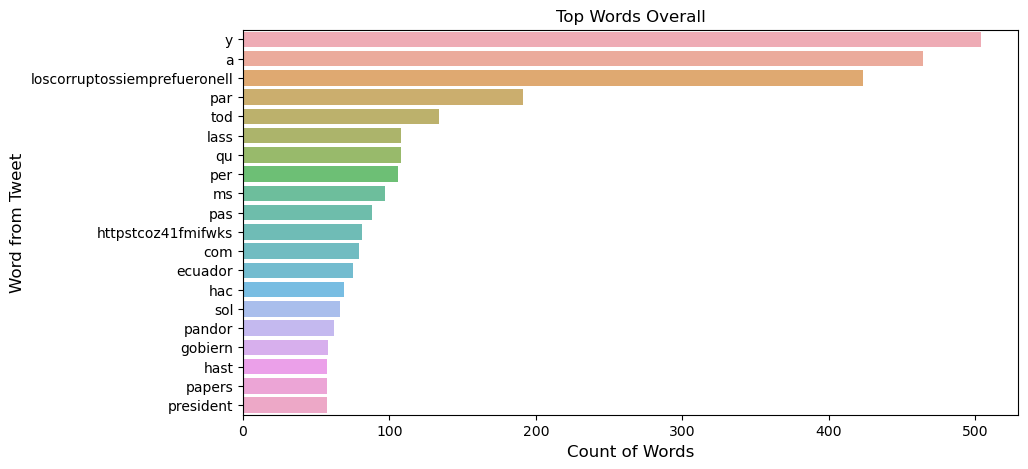

In [44]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:


rc_tweets_1 = rc_tweets[(rc_tweets['Date']>="2021-02-24") &
                       (rc_tweets['Date']<="2021-03-16")]

df_1 = df[(df['Date']>="2021-02-24") &
                       (df['Date']<="2021-03-16")]


tweets_df = rc_tweets_1 #df #rc_retweets

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.scatter(tweets_df.Date,
       tweets_df.Hour,
       color='purple')

# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Set title and labels for axes
plt.yticks(np.arange(0, 23+1, 1.0))
#plt.xticks(np.arange(int("2021-02-24"), int("2021-03-09"), 1.0))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.set(xlabel="Date",
       ylabel="Time of Day (Hour)",
       title="Daily Tweets by Hour\nFeb24 - Mar17 2021 for RC")
plt.grid()

plt.show()

In [ ]:
#mostlike = df.loc[df.likes.nlargest(5).index]

In [ ]:
#mostlike

#### Scraping tweets by keyword(# hasghtag):

In [ ]:
cursor = tweepy.Cursor(api.search, q="Bitcoin",tweet_mode="extender").items(1)

In [ ]:
#for i in cursor: #Not very informative
#    print(i)
    
#for i in cursor: # To see available things you could extract from cursor object. e.g. text
#    print(dir(i))

for i in cursor:
    print(i.text)